<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA 
</center></font>


<center><h2>Actividad 3</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Esteban Cordova</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>
 

# Ayudantía
## 1.1 Realiza la operación de convolución

<p align="justify">
Una de las operaciones más comunes en tratamiento de imagenes, video etc, es la convolución. Comienza por realizar una convolución entre una señal Pulso y una función impulso filtrada.


<center><img src="../../assets/scipy-signal-convolution.png"/></center>

## 1.2 Aplique la transformada rápida de fourier a una señal de audio
<p align="justify">
El archivo de audio debe ser formato .WAV, con menos de 30 segundo de duración.


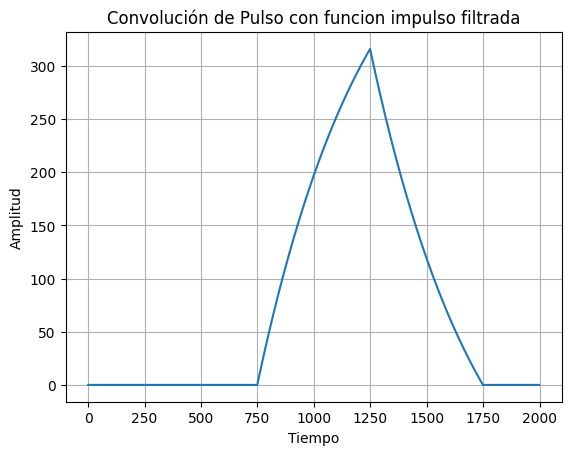

In [8]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
t = np.linspace(-1, 1, 1000) # Vector de tiempo
pulso = np.where(np.abs(t) < 0.5, 1.0, 0) # DUTY CICLE 50% AMPLITUD 1 MINIMO 0


impulso_filtrado = np.where(t >= 0, np.exp(-1 * t), 0)

# Convolución con la funcion convolve de scipy

conv = signal.convolve(pulso, impulso_filtrado)  
# Graficar
plt.plot(conv)
plt.title("Convolución de Pulso con funcion impulso filtrada")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid(True)
plt.show()


Tasa de muestreo: 44100
Frecuencia peak: 566.59


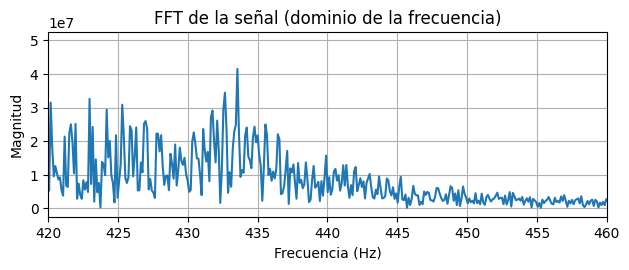

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
import scipy

tasa_muestreo, datos = wavfile.read("Exercise2.7_adultmale_b_d2.wav")

print("Tasa de muestreo:", tasa_muestreo)

#carga de audio
[sample_rate, pcm_data] = scipy.io.wavfile.read('Exercise2.7_adultmale_b_d2.wav')
amplitudes = np.array(pcm_data)


# Normalización
amplitudes_norm = amplitudes / np.max(np.abs(amplitudes))

gk=fft(amplitudes) #calculamos la fft

M_fft=abs(gk) # calculamos la magnitud de la fft

M_fft=M_fft[0:len(amplitudes)//2] # calculamos la magnitud de la fft

F= sample_rate*np.arange(0, len(amplitudes))/len(amplitudes) # definimos el vector de frecuencia
F=F[:len(amplitudes) // 2]


max_index = np.argmax(M_fft)       # sacamos el valor máximo de la magnitud
max_freq = F[max_index]           # Frecuencia correspondiente

print(f"Frecuencia peak: {max_freq:.2f}")


# Magnitud de la FFT
plt.subplot(2, 1, 2)
plt.plot(F, M_fft)
plt.title("FFT de la señal (dominio de la frecuencia)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")
plt.xlim(420, 460) 
plt.grid()

plt.tight_layout()
plt.show()

## 2. Cancelación de Ruido (Denoising)
<p align="justify">
Implementa un algoritmo para eliminar el ruido de una señal. Puedes apoyarte en esta referencia (https://www.youtube.com/watch?v=s2K1JfNR7Sc)

1. Debes tener la señal original
2. Debes agregar ruido a la señal
3. Obtener el valor medio de la señal con ruido
4. Implementar transformaciones y filtrado.
    


Media de la señal con ruido: -0.02262835374509766


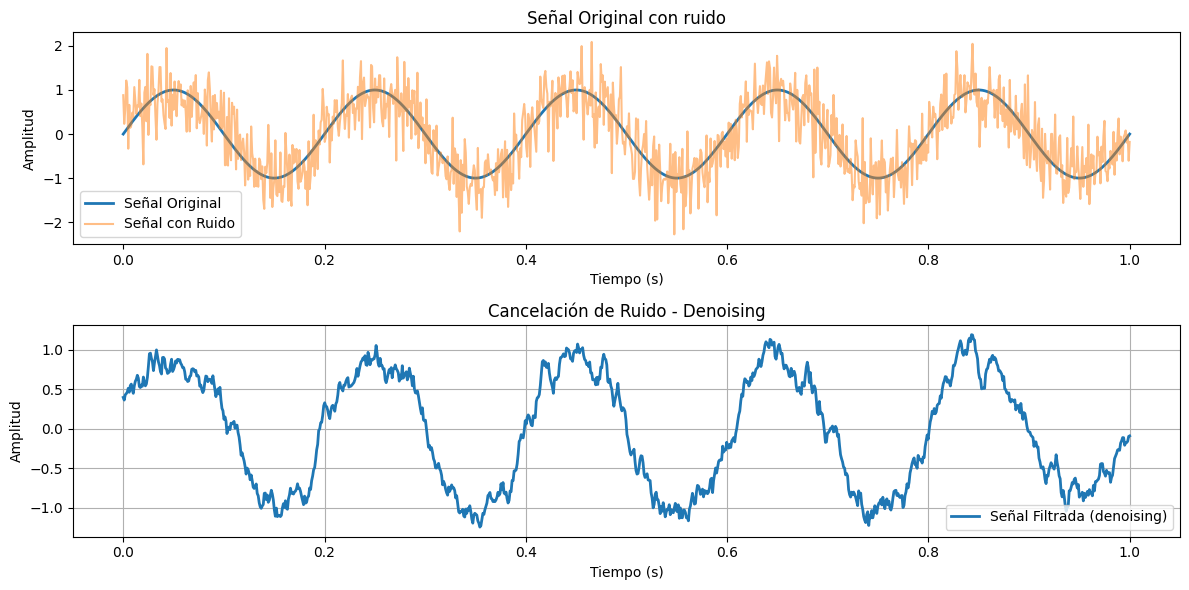

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Paso 1: Crear la señal original
fs = 1000                 # Frecuencia de muestreo (Hz)
t = np.linspace(0, 1, fs) # 1 segundo
freq = 5                  # Frecuencia de la señal (Hz)
signal_original = np.sin(2 * np.pi * freq * t)

# Paso 2: Agregar ruido gaussiano
np.random.seed(0)  # Reproducibilidad
noise = np.random.normal(0, 0.5, t.shape)
signal_ruidosa = signal_original + noise

# Paso 3: Obtener valor medio de la señal ruidosa
media_ruido = np.mean(signal_ruidosa)
print("Media de la señal con ruido:", media_ruido)

# Paso 4: Filtrado por media móvil (ventana de tamaño N)
N = 10  # Tamaño de la ventana
kernel = np.ones(N) / N
signal_filtrada = np.convolve(signal_ruidosa, kernel, mode='same')

# Graficar señales
plt.figure(figsize=(12, 6))
plt.subplot(2,1,1)
plt.plot(t, signal_original, label='Señal Original', linewidth=2)
plt.plot(t, signal_ruidosa, label='Señal con Ruido', alpha=0.5)
plt.title('Señal Original con ruido')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(2,1,2)
plt.plot(t, signal_filtrada, label='Señal Filtrada (denoising)', linewidth=2)
plt.title('Cancelación de Ruido - Denoising')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## 3. Wavelets
### 3.1 Desarrolla una transformada wavelet 1D
<p align="justify">
Implementa transformaciones con 1-D wavelet usando la función Mexican Hat Wavelet.

$$m(x) = \frac{2}{\sqrt{3 \sigma} \pi^{\frac{1}{4}}} \left(1-\frac{x^2}{\sigma^2}\right) e^{\frac{-x^2}{2 \sigma^2}}$$


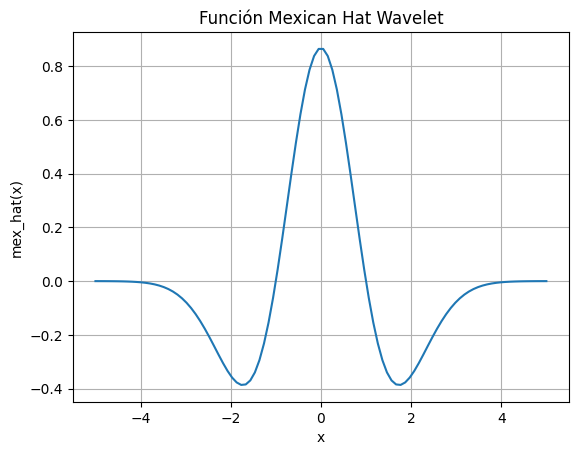

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def mexican_hat(x, mu, sigma):
    return (2 / (np.sqrt(3 * sigma) * np.pi ** 0.25)) * \
           (1 - (x ** 2 / sigma ** 2)) * \
           np.exp(-x ** 2 / (2 * sigma ** 2))

# Datos para probar la función
x = np.linspace(-5, 5, 100)
mu = 0
sigma = 1

# Calculo de la función Mexican Hat Wavelet
mex_hat = mexican_hat(x, mu, sigma)

# Visualizar la función Mexican Hat Wavelet
plt.plot(x, mex_hat)
plt.title('Función Mexican Hat Wavelet')
plt.xlabel('x')
plt.ylabel('mex_hat(x)')
plt.grid(True)
plt.show()
   


### 3.2 Escribe un algoritmo para calcular la transformada discreta
<p align="justify">
En cierta forma se trata solo de aplicar al sumatoria sobre una señal que tengas (obviamente debes definir una señal de estudio, con ruido o que tenga varías frecuencias involucradas).

Debes hacerlo solo para un nivel (level). Recuerda que la transformada trabaja por niveles y puede ser dispendioso. En este caso de debe considerar que $$a_0=2$$ y $$b_0=1$$, así como también debe asumir un valor específico para _m_.

En teoría, la transformada es como sigue:

$$ (T^{\text{wav}} f)(a,b) = \sqrt{|a|} \int dt \; f(t) \psi \left(\frac{t-b}{a}\right) $$

$a = a_0^m$ and $b = n b_0 a_0^m$

Aquí a y b son parámetros para la escala y posición de la wavelet. Esto se puede escribir de forma discreta de tal forma que puedas asignar una posición y escala a la onda asignando los valores que quieres, pero en este caso usarás $$a_0=2$$ y $$b_0=1$$. 

$$ (T^{\text{wav}} f)(a,b) = T^\text{wav}_{m,n}(f) = \int dt \; f(t) \psi_{m,n} (x) $$
con
$$ \psi_{m,n} = a_0^{\frac{-m}{2}} \psi\left(a_0^{-m}x - nb_0\right) $$

### Recuerda que la integral se convierte en una sumatoria.

###  3.2.1. Explica el siguiente fragmento de código en detalle

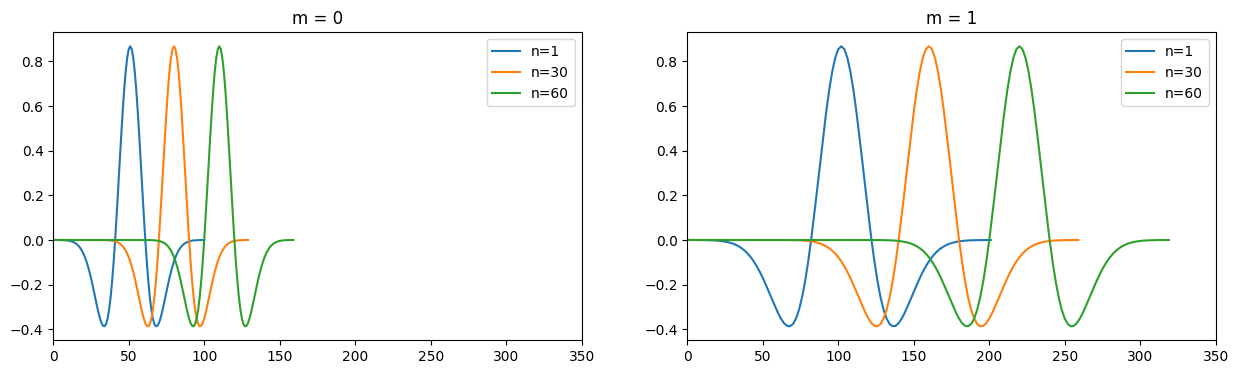

In [5]:
# we assume a0 = 2 and b0 = 1
# These are the scaling and translation factors
#using just o pair, means an specific wavelet
def psi_mn(psi, m, n):
    a = 2**m    #Escalar la funcion original
    b = n*2**m  #transladar la funcion en el eje x
    wav = np.zeros(len(psi)*a + b)  #Se crea un arreglo de ceros para ubicar la función psi escalada y desplazada en un nuevo dominio de mayor tamaño
    wav[b:b+len(psi)*a] = np.interp(np.arange(len(psi)*a)/a,np.arange(len(psi)),psi) #interpola la función psi para simular su estiramiento o compresión
    return wav #Devuelve la wavelet modificada

psi = mexican_hat(np.arange(-5,5,0.1),0,1) #Se genera la wavelet base con el método mexican_hat(x, mu, sigma), usando un dominio entre -5 y 5.

#Se define el rango de visualización en x, las traslaciones n, las escalas m y el tamaño de la figura.
xlim = (0,350)
ns = [1, 30, 60]
ms = [0, 1]
plt.figure(figsize=(15,4))

#Para cada escala m, se grafica cómo se comporta la wavelet desplazada con diferentes n.
plt.subplot(121)
for mi in range(len(ms)):
    m = ms[mi]
    plt.subplot(1,len(ms),mi+1)
    for n in ns:
        plt.plot(psi_mn(psi, m, n), label="n="+str(n))
    plt.title("m = "+str(m))
    plt.legend(loc="best")
    plt.xlim(xlim)
plt.show()


### 3.2.2 completa el siguiente código para realizar la transformada


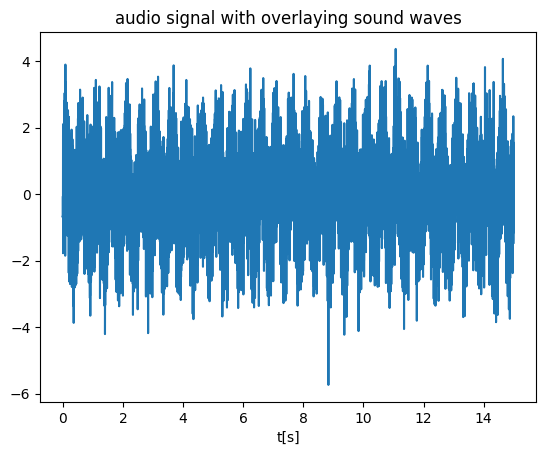

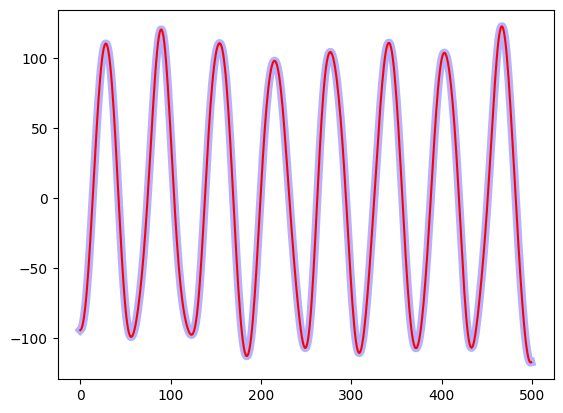

In [ ]:

"""Transformed considering the sum over the section under study"""
def twav_mn(f, psi, m, n):
    a = 2**m                 # Controla el ancho de la wavelet
    b = n*2**m               # Controla la posición temporal de la wavelet
    length = len(psi)*a      # Longitud de la wavelet escalada
    if b + length > len(f):  # Evita que la wavelet se salga de los límites de f
        return 0
    # Interpolamos la wavelet escalada
    psi_scaled = np.interp(np.arange(length)/a, np.arange(len(psi)), psi)
    f_section = f[b:b+length]  # Tomamos la sección correspondiente de la señal
    transform_scaled = np.sum(f_section * psi_scaled)  # Producto punto entre señal y wavelet escalada
    return transform_scaled

"""Naive Transform adding over the whole length"""

def twav_mn_naive(f, psi, m, n):
    pmn = psi_mn(psi, m, n)           # Construye una wavelet hija colocada en todo el eje
    min_len = min(len(f), len(pmn))  # Se asegura de que no exceda el tamaño de la señal
    transform = np.sum(f[:min_len] * pmn[:min_len])  # Producto punto parcial
    return transform


m = 3 #single value for m
ns = np.arange(1000,1500)
res=1000 #resolution
freq=2 #frequency
"""Creating a wave to analyse"""
x = np.arange(0,15000,1) # Produces [0, 100) with steps of 2.
noise = np.random.normal(0,1, len(x)) #  μ = 0, σ = 2, size = length of x or y. Choose μ and σ wisely.
#adding noise
audio=np.sin(np.arange(15000)*2*np.pi*freq/res)+noise


transformed_sweept=[twav_mn(audio, psi, m, n) for n in ns]
naive_transformed_sweept=[twav_mn_naive(audio, psi, m, n) for n in ns]

plt.plot(np.arange(len(audio),dtype="float32")/res,audio)
plt.xlabel("t[s]")
plt.title("audio signal with overlaying sound waves")
plt.show()



plt.plot(transformed_sweept,color="blue", lw=6, alpha=0.3)
plt.plot(naive_transformed_sweept, "r-")
plt.show()

### 3.3 Wavelet usando librería
<p align="justify">
Usa la librería PyWavelets (pywt) con los datos provenientes del dataset  = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat". Estos datos son históricos sobre el fenómeno del Niño. 

0. Debes descargar los datos desde python, usando numpy o pandas, debes aplicar la transformada continua pywt.cwt.

1. Obtendrás los coeficientes de la transformación.
2. Debes poner todos los resultados en términos de potencia. 
3. Debes graficar el resultado tanto en el periodo como en la frecuencia usando un plot tipo contour.

Text(0, 0.5, 'Frecuencia')

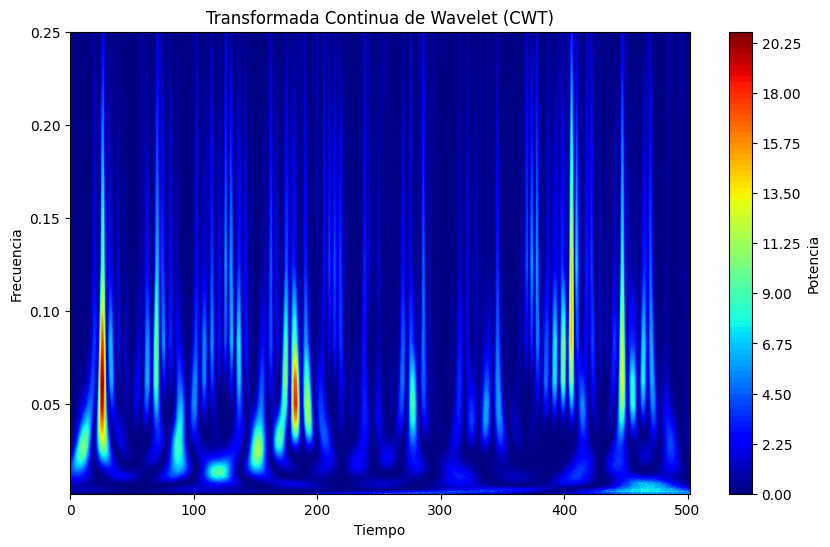

In [17]:
import pywt
import pandas as pd

link = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"

#Lee los datos
datos = pd.read_table(link)

#Sacamos la serie de tiempo de los datos.
signal = datos.values.squeeze()

#Aplicación de la transformada, utilizando el wavelet mexican hat.
coef, freqs = pywt.cwt(data=signal, scales = np.arange(1, 128), wavelet = "mexh")

#Pasamos datos a términos de potencia.
power = (abs(coef))**2
#Escalograma de la transformada continua.
plt.figure(figsize=(10, 6))
plt.contourf(np.arange(len(signal)), freqs, power, cmap='jet', levels=100)
plt.colorbar(label='Potencia')
plt.title('Transformada Continua de Wavelet (CWT)')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia')

### 3.4 Interpreta los resultados del punto anterior.
<p align="justify">
Debes explicar que significa el gráfico obtenido  en términos del periodo o frecuencia del evento que estamos analizando.

El gráfico obtenido representa la distribución de potencia de la señal sobre las anomalías de temperatura del océano Pacífico en la región Niño a lo largo del tiempo.

Los colores cálidos (rojo, amarillo): Alta potencia de señal en ese período y momento en el tiempo significan que hay una fuerte oscilación de ese período en ese instante.

Los colores fríos (azul oscuro): Baja potencia no hay eventos significativos en ese rango temporal o frecuencia.

## 4. Obtén el espectrograma de tu señal de audio
Sobre la señal de audio en el punto 1 de la actividad, debe presentar el espectragrama


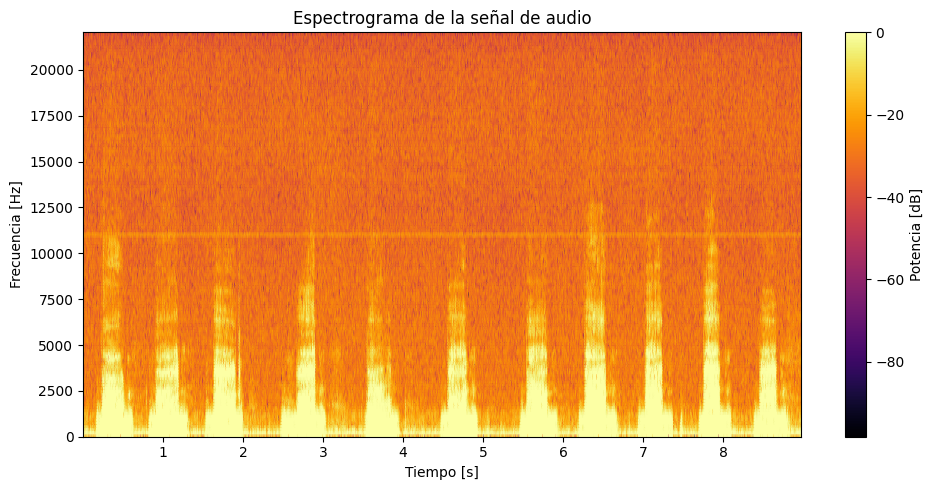

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram

# Paso 1: Cargar el archivo de audio WAV
rate, audio = wavfile.read("Exercise2.7_adultmale_b_d2.wav")

# Si el audio es estéreo, lo convertimos a mono
if audio.ndim > 1:
    audio = audio[:, 0]

# Paso 2: Calcular el espectrograma
frequencies, times, Sxx = spectrogram(audio, fs=rate)

# Convertir a decibelios y limitar entre -100 y 0 dB
Sxx_dB = 10 * np.log10(Sxx + 1e-10)  # evitar log(0) añadiendo un valor pequeño
Sxx_dB = np.clip(Sxx_dB, -100, 0)

# Graficar
plt.figure(figsize=(10, 5))
plt.pcolormesh(times, frequencies, Sxx_dB, shading='gouraud', cmap='inferno')
plt.colorbar(label='Potencia [dB]')
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [s]')
plt.title('Espectrograma de la señal de audio')
plt.tight_layout()
plt.show()


## 5. Slicing
Desarrolla un framento de código que te permita tomar una señal de audio y framentarla en N segmentos o slices. Debe asignar la longitud temporal de cada slice y el programa debe indicar el número de slices que quedan. Considera que al final puede quedar un slice de longitud diferente a todos los demas.

En el slicing debes también incluir un gap o overlap a lado y lado de cada uno de los fragmentos. Este overlap debe ser ajustable del número de muestras que constituyen dicho overlap.

<center><img src="../../assets/slices.png"/></center>


In [1]:
import numpy as np
from scipy.io import wavfile

def slice_audio(audio, rate, slice_duration_sec, overlap_samples):
    slice_length = int(slice_duration_sec * rate)
    step = slice_length - overlap_samples  # Si overlap_samples < 0, es un GAP
    slices = []

    i = 0
    while i < len(audio):
        end = i + slice_length
        slices.append(audio[i:end])
        i += step

    print(f"Número de slices generados: {len(slices)}")
    
    
    return slices

# === Cargar audio ===
rate, audio = wavfile.read("Exercise2.7_adultmale_b_d2.wav")
if audio.ndim > 1:
    audio = audio[:, 0]  # Convertir a mono si es estéreo

# === Parámetros de slicing ===
slice_duration_sec = 0.5  # Duración de cada slice en segundos
overlap_samples = 1000    # Ajusta: positivo = solapamiento, negativo = separación

# === Fragmentar audio ===
slices = slice_audio(audio, rate, slice_duration_sec, overlap_samples)


Número de slices generados: 19


## 5.1 Slicing usando Pytorch de la señal obtenida en el primer punto.
Debes crear un array con los slices creados a partir de tensores en pytorch.
Grafica un par de tus slices y reproduce el audio.


Número de slices creados: 19
Tamaño del tensor de slices: torch.Size([19, 22050])


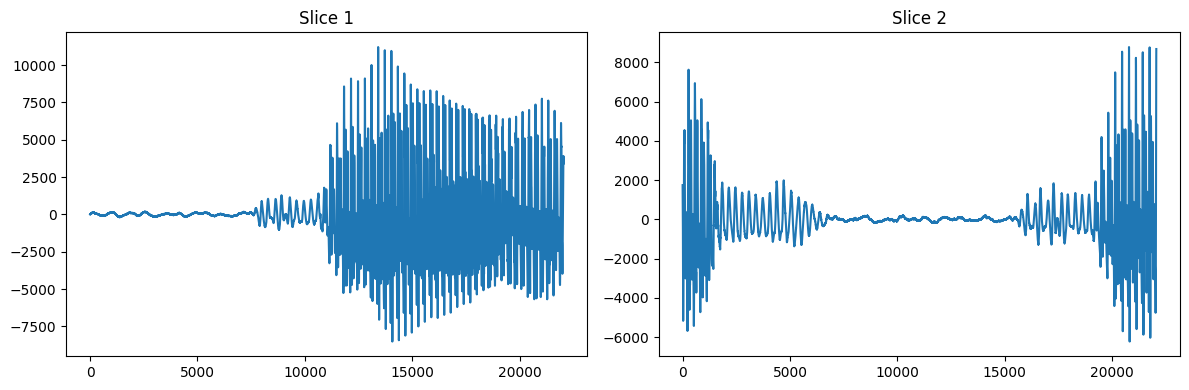

In [28]:
import torch
from IPython.display import Audio
# === Cargar audio ===
rate, audio_np = wavfile.read("Exercise2.7_adultmale_b_d2.wav")
if audio_np.ndim > 1:
    audio_np = audio_np[:, 0]  # Convertir a mono si es estéreo

audio = torch.tensor(audio_np, dtype=torch.float32)

# === Parámetros de slicing ===
slice_duration_sec = 0.5
overlap_samples = 1000
slice_length = int(slice_duration_sec * rate)
step = slice_length - overlap_samples

# === Crear slices como tensores ===
slices = []
i = 0
while i < len(audio):
    end = i + slice_length
    slices.append(audio[i:end])
    i += step

slices_tensor = torch.nn.utils.rnn.pad_sequence(slices, batch_first=True)  # padding si el último es más corto

print(f"Número de slices creados: {len(slices)}")
print(f"Tamaño del tensor de slices: {slices_tensor.shape}")

# === Graficar dos slices ===
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(slices[0].numpy())
plt.title("Slice 1")
plt.subplot(1, 2, 2)
plt.plot(slices[1].numpy())
plt.title("Slice 2")
plt.tight_layout()
plt.show()

# === Reproducir un slice ===
Audio(slices[0].numpy(), rate=rate)

## 6. Filtro Butterworth para una señal de audio.
Diseña y aplica un filtro butterworth a tu señal de audio, para diferentes ordenes y niveles de rizado.
Muestra gráficos con las diferentes respuestas del filtro butterworth y explica el resultado. 

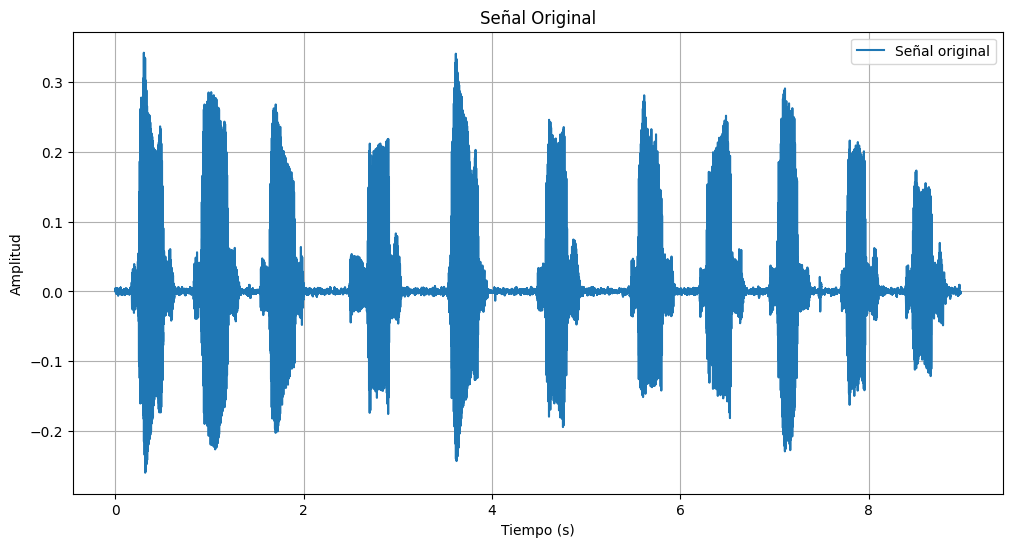

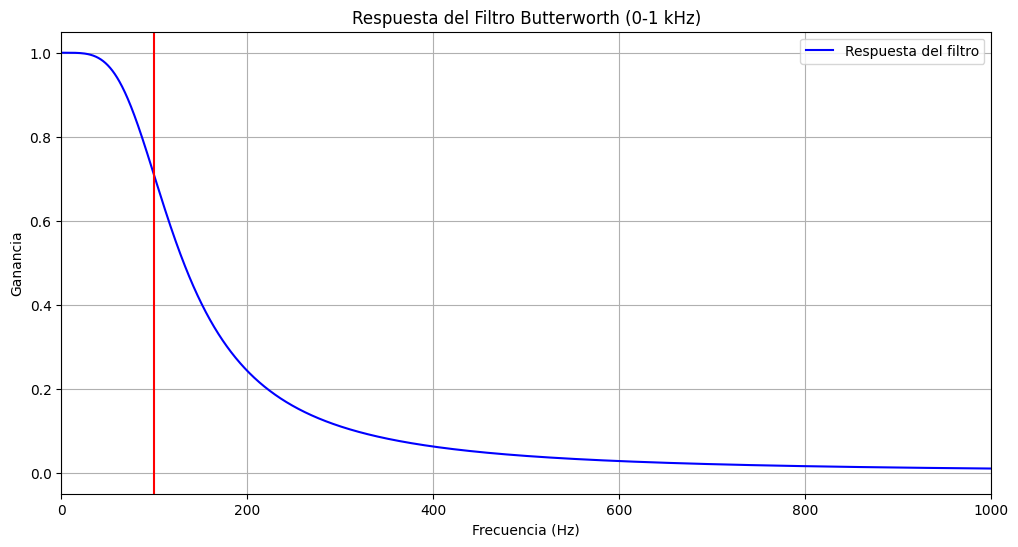

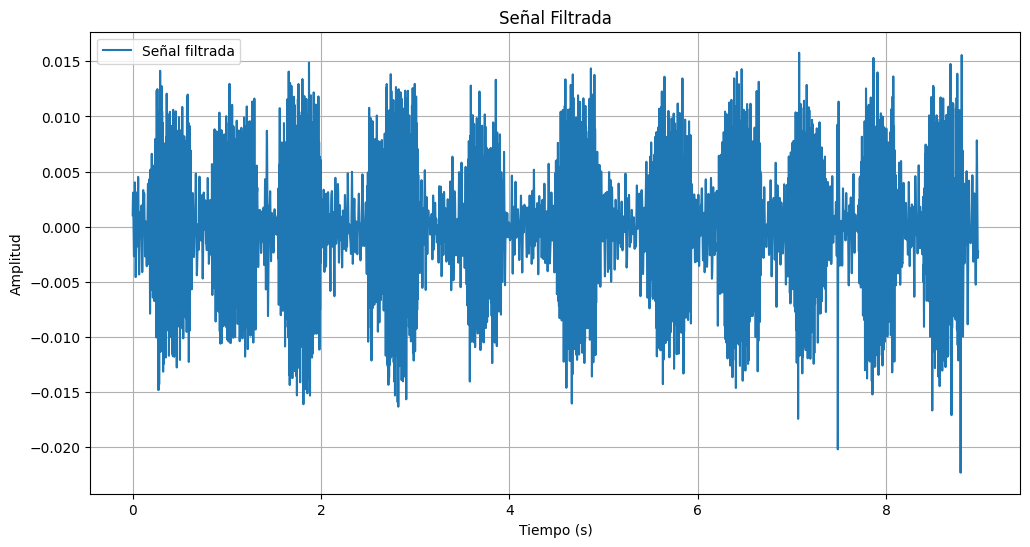

In [39]:
import numpy as np
import scipy.signal as signal
import librosa
import matplotlib.pyplot as plt

# Cargar el archivo de audio
audio_file = "Exercise2.7_adultmale_b_d2.wav"
audio, sr = librosa.load(audio_file, sr=None)

# Calcular el tiempo en segundos para la señal original
tiempo = np.arange(len(audio)) / sr

# Especificar los parámetros del filtro
order = 2  #
cutoff_freq = 100

# Diseñar el filtro
b, a = signal.butter(order, cutoff_freq, fs=sr, btype='low', analog=False)

# Aplicar el filtro
filtered_audio = signal.filtfilt(b, a, audio)


# Calcular la respuesta en frecuencia del filtro
w, h = signal.freqz(b, a, worN=sr)

# Crear figura y ejes para la señal original
plt.figure(figsize=(12, 6))
plt.plot(tiempo, audio, label='Señal original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal Original')
plt.legend()
plt.grid(True)
plt.show()

# Crear figura y ejes para la respuesta del filtro entre 0 y 1 kHz
plt.figure(figsize=(12, 6))
plt.plot(0.5 * sr * w/np.pi, np.abs(h), 'b', label='Respuesta del filtro')
plt.axvline(cutoff_freq, color='r')
plt.xlim(0, 1000)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia')
plt.title('Respuesta del Filtro Butterworth (0-1 kHz)')
plt.legend()
plt.grid(True)
plt.show()

# Crear figura y ejes para la señal filtrada
plt.figure(figsize=(12, 6))
plt.plot(tiempo, filtered_audio,label='Señal filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal Filtrada')
plt.legend()
plt.grid(True)
plt.show()




## 7. Referencias
<p align="justify">

https://notebook.community/CSchoel/learn-wavelets/wavelet-introduction

https://www.kaggle.com/code/asauve/a-gentle-introduction-to-wavelet-for-data-analysis

https://pywavelets.readthedocs.io/en/latest/ref/cwt.html

[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Cancelación de ruido en datos] https://towardsdatascience.com/noise-cancellation-with-python-and-fourier-transform-97303314aa71

[Convolución en Scipy]https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html

[Wavelet transform applications]https://scicoding.com/introduction-to-wavelet-transform-using-python/

    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html
